# Understanding Descriptive Statistics

Import the necessary libraries here:

In [17]:
# Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [18]:
# your code here
def dice(a):
    return pd.DataFrame(np.array([random.choice(np.arange(1, 10)) for i in range(10)]))

#### 2.- Plot the results sorted by value.

[Text(0.5, 1.0, '10 times dice')]

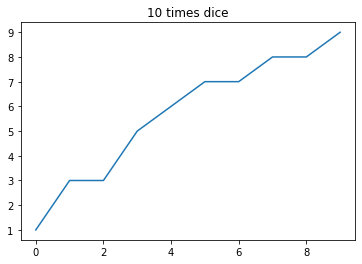

In [19]:
# your code here

results = dice(10).sort_values(by=0).reset_index()[0]
results.plot()
plt.gca().set(title='10 times dice')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

[Text(0.5, 1.0, 'Frequency Histogram'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Size')]

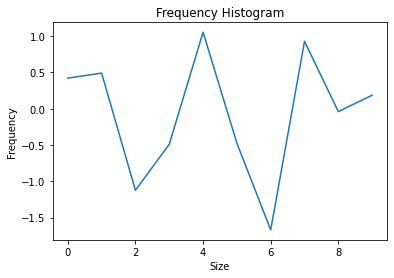

In [20]:
# your code here
x = np.random.normal(size = 10)
plt.plot(x)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency', xlabel= 'Size')

In [21]:
"""
No hay relación entre el 1er plot y el segundo 
"""

'\nNo hay relación entre el 1er plot y el segundo \n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [22]:
# your code here
def average(data):
    return sum(data)/len(data)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [23]:
# your code here
def freq(lst):
    d = {}
    for i in lst:
        if d.get(i):
            d[i] += 1
        else:
            d[i] = 1
    return d

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [24]:
# your code here
def median(lst):
    n = len(lst)
    s = sorted(lst)
    return (s[n//2-1]/2.0+s[n//2]/2.0, s[n//2])[n % 2] if n else None

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [25]:
# your code here
import math
def quantile_p(data, p):
    pos = (len(data) + 1)*p
    #pos = 1 + (len(data)-1)*p
    pos_integer = int(math.modf(pos)[1])
    pos_decimal = pos - pos_integer
    Q = data[pos_integer - 1] + (data[pos_integer] - data[pos_integer - 1])*pos_decimal
    return Q

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [26]:
# your code here

dice_df = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice_values = sorted(dice_df['value'])

In [27]:
dice_df.describe()

,Unnamed: 0,roll,value
count,100.000000,100.000000,100.000000
mean,49.500000,49.500000,3.740000
std,29.011492,29.011492,1.703354
min,0.000000,0.000000,1.000000
25%,24.750000,24.750000,2.000000
50%,49.500000,49.500000,4.000000
75%,74.250000,74.250000,5.000000
max,99.000000,99.000000,6.000000


<AxesSubplot:>

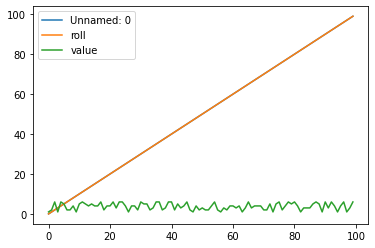

In [28]:
dice_df.plot()

In [29]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [30]:
# your code here
average(dice_values)

3.74

#### 3.- Now, calculate the frequency distribution.


In [31]:
# your code here
freq(dice_values)

{1: 12, 2: 17, 3: 14, 4: 22, 5: 12, 6: 23}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([29., 14., 22., 35.]),
 array([1.  , 2.25, 3.5 , 4.75, 6.  ]),
 <BarContainer object of 4 artists>)

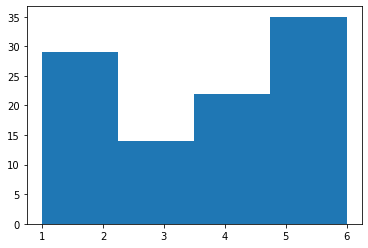

In [32]:
# your code here
plt.hist(dice_values, bins=4)

In [33]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [34]:
# your code here
roll_dice_df = pd.read_csv('../data/roll_the_dice_thousand.csv')
roll_dice_df

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


(array([342., 175., 168., 315.]),
 array([1.  , 2.25, 3.5 , 4.75, 6.  ]),
 <BarContainer object of 4 artists>)

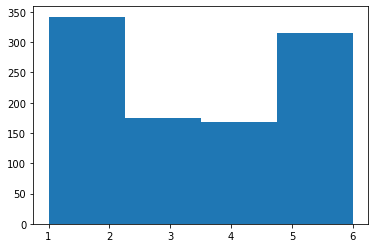

In [35]:
roll_dice_values = sorted(roll_dice_df['value'])
plt.hist(roll_dice_values, bins=4)

In [36]:
"""
En ambos df los plot son bastante similares
"""

'\nEn ambos df los plot son bastante similares\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

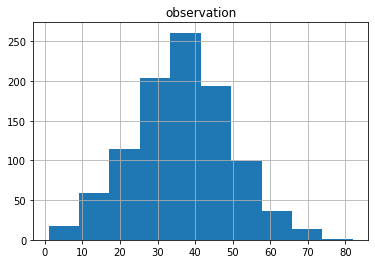

In [37]:
# your code here
ages = pd.read_csv('../data/ages_population.csv')
ages.hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [38]:
# your code here
ages.observation.mean()

36.56

In [39]:
ages.observation.std()

12.816499625976762

In [40]:
"""
la edad predominante y, por tanto, la media se sitúa en torno a los 35 años siendo los rangos desde los 25 hasta los 
45 los que predominan en el df
"""

'\nla edad predominante y, por tanto, la media se sitúa en torno a los 35 años siendo los rangos desde los 25 hasta los \n45 los que predominan en el df\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

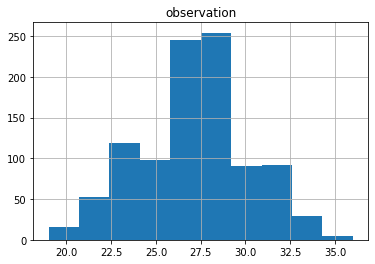

In [41]:
# your code here
ages2 = pd.read_csv('../data/ages_population2.csv')
ages2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [42]:
"""
Es bastante similar al primer ejemplo, siendo este segundo la edad predominante entre los 25 y 30 años
"""

'\nEs bastante similar al primer ejemplo, siendo este segundo la edad predominante entre los 25 y 30 años\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [43]:
# your code here
ages2.observation.mean()

27.155

In [44]:
ages2.observation.std()

2.969813932689186

In [45]:
"""
Los datos son menos dispersos, la media y la desviación son más bajos proporcionalmente que el primer df
"""

'\nLos datos son menos dispersos, la media y la desviación son más bajos proporcionalmente que el primer df\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

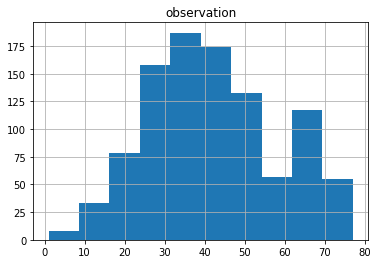

In [46]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')
ages3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [47]:
# your code here
ages3.observation.mean()

41.989

In [48]:
ages3.observation.std()

16.144705959865934

In [49]:
"""
La desviación marca una dispersión bastante alta por lo que no hay un rango de edad que predomine claramente con 
otras edades
"""

'\nLa desviación marca una dispersión bastante alta por lo que no hay un rango de edad que predomine claramente con \notras edades\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [50]:
# your code here
ages3.observation.quantile(0.25)

30.0

In [51]:
ages3.observation.quantile(0.5)

40.0

In [52]:
ages3.observation.quantile(0.75)

53.0

In [53]:
"""
No hay una gran variación con la media 
"""

'\nNo hay una gran variación con la media \n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [54]:
# your code here
ages3.observation.quantile(0.15)

25.0

In [55]:
ages3.observation.quantile(0.30)

32.0

In [56]:
ages3.observation.quantile(0.60)

45.0

In [57]:
"""
Vemos que con los percentiles que indicamos la edad es bastante más elevada que los otros 2 df.
"""

'\nVemos que con los percentiles que indicamos la edad es bastante más elevada que los otros 2 df.\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""